In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"1HizqrBo8embIgBDNsb_Akk1OwUO4v_fX"})   # replace the id with id of file you want to access
downloaded.GetContentFile('finaldata.csv') 
df = pd.read_csv('finaldata.csv', encoding="ISO-8859-1")
df

,Age,Sex,rural,urban,Chest pain,Dyspnoea,Height,weight,BMI new,W/H ratio,SBP,DBP,PULSE,METS,HTN
0,53,F,NaN,Y,N,N,159.0,50.0,19.8,0.91,120.0,80.0,80.0,8.2,N
1,55,F,Y,NaN,N,N,156.0,82.0,33.7,0.96,120.0,80.0,80.0,NaN,N
2,41,M,NaN,Y,N,Y,173.0,80.0,26.7,0.87,130.0,80.0,80.0,10.0,N
3,65,M,NaN,Y,N,N,174.0,132.0,43.6,1.04,130.0,70.0,80.0,NaN,Y
4,66,M,NaN,Y,N,Y,165.0,55.0,20.2,0.91,140.0,80.0,80.0,10.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,62,F,NaN,NaN,N,Y,156.0,63.0,25.9,0.98,150.0,80.0,80.0,NaN,Y
4491,56,M,NaN,Y,N,Y,174.0,73.0,24.1,0.91,130.0,80.0,84.0,10.0,N
4492,48,M,Y,NaN,N,Y,180.0,87.0,26.9,0.96,170.0,100.0,84.0,NaN,Y
4493,59,M,NaN,Y,N,N,168.0,80.0,28.3,1.00,110.0,70.0,76.0,8.8,N


In [ ]:
df = df.replace({'HTN': {'Y': 1, 'N': 0}})
df = df.replace({'Chest pain': {'Y': 1, 'N': 0}})
df = df.replace({'Dyspnoea': {'Y': 1, 'N': 0}})
df['rural'] = df['rural'].fillna(0)
df = df.replace({'rural': {'Y':1}})
df['urban'] = df['urban'].fillna(0)
df = df.replace({'urban': {'Y':1}})
df = df.replace({'Sex': {'M': 1, 'F': 0}})
df = df.dropna()
df = df.replace({'urban': {'y':1}})
df = df.replace({'rural': {'y':1}})
df = df.replace({'Chest pain': {'y':1}})
df = df.replace({'Dyspnoea': {'y':1}})
df = df.replace({'HTN': {'y':1}})

In [ ]:
df

,Age,Sex,rural,urban,Chest pain,Dyspnoea,Height,weight,BMI new,W/H ratio,SBP,DBP,PULSE,METS,HTN
0,53,0,0,1,0,0,159.0,50.0,19.8,0.91,120.0,80.0,80.0,8.2,0
2,41,1,0,1,0,1,173.0,80.0,26.7,0.87,130.0,80.0,80.0,10.0,0
4,66,1,0,1,0,1,165.0,55.0,20.2,0.91,140.0,80.0,80.0,10.0,0
5,47,1,0,1,0,0,166.0,91.0,33.0,0.86,130.0,70.0,80.0,10.0,0
6,30,1,0,1,0,1,168.0,89.0,31.5,0.91,120.0,80.0,77.0,13.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,55,0,1,0,1,1,146.0,57.0,26.7,0.94,110.0,80.0,72.0,7.9,0
4488,58,0,1,0,0,0,159.0,72.0,28.5,0.96,140.0,80.0,80.0,9.0,1
4489,51,0,0,1,1,0,152.0,63.0,27.3,0.97,110.0,70.0,84.0,8.2,0
4491,56,1,0,1,0,1,174.0,73.0,24.1,0.91,130.0,80.0,84.0,10.0,0


In [ ]:
df.corr()

,Age,Sex,rural,urban,Chest pain,Dyspnoea,Height,weight,BMI new,W/H ratio,SBP,DBP,PULSE,METS,HTN
Age,1.000000,-0.063197,-0.059305,0.032977,-0.105824,0.000990,-0.160960,-0.129672,-0.042354,0.144144,0.065547,0.052635,-0.034762,-0.500327,0.158027
Sex,-0.063197,1.000000,-0.027027,0.009485,-0.015179,-0.113395,0.702958,0.378703,-0.051875,0.186484,0.035922,0.018217,-0.058815,0.468425,0.031585
rural,-0.059305,-0.027027,1.000000,-0.838837,0.059052,0.036097,0.044016,-0.012263,-0.041480,-0.000011,0.054820,-0.002461,-0.007822,0.031243,0.016069
urban,0.032977,0.009485,-0.838837,1.000000,-0.042299,-0.003243,-0.051237,0.009758,0.044134,-0.004724,-0.018525,-0.013211,0.010142,-0.033928,-0.005139
Chest pain,-0.105824,-0.015179,0.059052,-0.042299,1.000000,0.196109,0.000621,0.006312,0.008691,-0.014590,0.084551,-0.099725,0.035289,0.012799,0.069805
Dyspnoea,0.000990,-0.113395,0.036097,-0.003243,0.196109,1.000000,-0.090150,0.082187,0.152755,0.015245,0.105530,-0.110656,0.055247,-0.150584,0.136843
Height,-0.160960,0.702958,0.044016,-0.051237,0.000621,-0.090150,1.000000,0.519243,-0.092342,0.106689,0.015426,0.005516,-0.065472,0.422004,-0.005516
weight,-0.129672,0.378703,-0.012263,0.009758,0.006312,0.082187,0.519243,1.000000,0.773530,0.144875,0.068098,0.028151,0.005729,0.080206,0.094277
BMI new,-0.042354,-0.051875,-0.041480,0.044134,0.008691,0.152755,-0.092342,0.773530,1.000000,0.092481,0.066167,0.030276,0.048699,-0.193844,0.105710
W/H ratio,0.144144,0.186484,-0.000011,-0.004724,-0.014590,0.015245,0.106689,0.144875,0.092481,1.000000,0.024295,0.014942,0.009784,-0.043102,0.059777


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from keras.layers import Dense
# import numpy as np
from sklearn.model_selection import train_test_split
import os;
!pip install keras_tuner
import keras_tuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 6.7 MB/s 


In [ ]:
def model_builder():
  model=Sequential()
  model.add(Dense(5,input_shape=(14,),activation='relu'))
  model.add(Dense(25,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(
      reduction="auto", name="accuracy"
  ), metrics=['accuracy'])
  return model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('HTN',axis=1), 
                                                    df['HTN'], test_size=0.30, 
                                                    random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       815
           1       0.65      0.35      0.45       331

    accuracy                           0.76      1146
   macro avg       0.71      0.64      0.65      1146
weighted avg       0.74      0.76      0.73      1146

[[752  63]
 [216 115]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
X = df.drop('HTN', axis=1)
Y = df['HTN']
import numpy as np
col_means = np.mean(X, axis = 0)
print(col_means)

datasets = []
for i in range(len(col_means)):
  X_alt = np.array(X)
  X_alt[:, i] = col_means[i]
  datasets.append(X_alt)

Age            48.684652
Sex             0.672080
rural           0.304872
urban           0.616029
Chest pain      0.159770
Dyspnoea        0.258774
Height        167.008381
weight         78.494788
BMI new        28.085202
W/H ratio       0.922747
SBP           107.101886
DBP            97.634364
PULSE          77.538240
METS            9.070946
dtype: float64


In [ ]:
for i in range(len(col_means)):
  X_train, X_test, y_train, y_test = train_test_split(datasets[i], Y, test_size=0.30, random_state=101)
  logmodel = LogisticRegression()
  logmodel.fit(X_train,y_train)
  predictions = logmodel.predict(X_test)
  from sklearn.metrics import classification_report
  print(classification_report(y_test,predictions))
  from sklearn.metrics import confusion_matrix
  print(confusion_matrix(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.77      0.93      0.84       815
           1       0.64      0.31      0.42       331

    accuracy                           0.75      1146
   macro avg       0.71      0.62      0.63      1146
weighted avg       0.73      0.75      0.72      1146

[[758  57]
 [228 103]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.78      0.93      0.85       815
           1       0.66      0.34      0.45       331

    accuracy                           0.76      1146
   macro avg       0.72      0.63      0.65      1146
weighted avg       0.74      0.76      0.73      1146

[[759  56]
 [220 111]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.78      0.92      0.84       815
           1       0.65      0.35      0.45       331

    accuracy                           0.76      1146
   macro avg       0.71      0.64      0.65      1146
weighted avg       0.74      0.76      0.73      1146

[[752  63]
 [216 115]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.78      0.93      0.85       815
           1       0.67      0.35      0.46       331

    accuracy                           0.76      1146
   macro avg       0.72      0.64      0.65      1146
weighted avg       0.75      0.76      0.73      1146

[[758  57]
 [216 115]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.78      0.93      0.85       815
           1       0.67      0.35      0.46       331

    accuracy                           0.76      1146
   macro avg       0.72      0.64      0.65      1146
weighted avg       0.75      0.76      0.74      1146

[[758  57]
 [215 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.78      0.94      0.85       815
           1       0.69      0.34      0.45       331

    accuracy                           0.76      1146
   macro avg       0.73      0.64      0.65      1146
weighted avg       0.75      0.76      0.74      1146

[[764  51]
 [219 112]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       815
           1       0.66      0.35      0.46       331

    accuracy                           0.76      1146
   macro avg       0.72      0.64      0.65      1146
weighted avg       0.74      0.76      0.73      1146

[[756  59]
 [216 115]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.78      0.93      0.85       815
           1       0.66      0.34      0.45       331

    accuracy                           0.76      1146
   macro avg       0.72      0.64      0.65      1146
weighted avg       0.74      0.76      0.73      1146

[[757  58]
 [217 114]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.78      0.93      0.85       815
           1       0.66      0.35      0.46       331

    accuracy                           0.76      1146
   macro avg       0.72      0.64      0.65      1146
weighted avg       0.75      0.76      0.73      1146

[[755  60]
 [214 117]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.78      0.94      0.85       815
           1       0.69      0.34      0.46       331

    accuracy                           0.77      1146
   macro avg       0.73      0.64      0.65      1146
weighted avg       0.75      0.77      0.74      1146

[[763  52]
 [217 114]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.74      0.94      0.83       815
           1       0.57      0.19      0.28       331

    accuracy                           0.72      1146
   macro avg       0.65      0.56      0.56      1146
weighted avg       0.69      0.72      0.67      1146

[[768  47]
 [269  62]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.78      0.92      0.84       815
           1       0.65      0.34      0.45       331

    accuracy                           0.76      1146
   macro avg       0.71      0.63      0.65      1146
weighted avg       0.74      0.76      0.73      1146

[[753  62]
 [217 114]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.78      0.93      0.85       815
           1       0.67      0.34      0.46       331

    accuracy                           0.76      1146
   macro avg       0.72      0.64      0.65      1146
weighted avg       0.75      0.76      0.73      1146

[[759  56]
 [217 114]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.84       815
           1       0.66      0.34      0.45       331

    accuracy                           0.76      1146
   macro avg       0.72      0.64      0.65      1146
weighted avg       0.74      0.76      0.73      1146

[[755  60]
 [217 114]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
df_n = df.drop('SBP', axis=1)
df_n = df_n.drop('DBP', axis=1)
df_n = df_n.drop('METS', axis=1)

In [ ]:
df_n

,Age,Sex,rural,urban,Chest pain,Dyspnoea,Height,weight,BMI new,W/H ratio,PULSE,HTN
0,53,0,0,1,0,0,159.0,50.0,19.8,0.91,80.0,0
2,41,1,0,1,0,1,173.0,80.0,26.7,0.87,80.0,0
4,66,1,0,1,0,1,165.0,55.0,20.2,0.91,80.0,0
5,47,1,0,1,0,0,166.0,91.0,33.0,0.86,80.0,0
6,30,1,0,1,0,1,168.0,89.0,31.5,0.91,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4487,55,0,1,0,1,1,146.0,57.0,26.7,0.94,72.0,0
4488,58,0,1,0,0,0,159.0,72.0,28.5,0.96,80.0,1
4489,51,0,0,1,1,0,152.0,63.0,27.3,0.97,84.0,0
4491,56,1,0,1,0,1,174.0,73.0,24.1,0.91,84.0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_n.drop('HTN',axis=1), 
                                                    df_n['HTN'], test_size=0.30, 
                                                    random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       815
           1       0.61      0.13      0.21       331

    accuracy                           0.72      1146
   macro avg       0.67      0.55      0.52      1146
weighted avg       0.70      0.72      0.65      1146

[[787  28]
 [288  43]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('HTN',axis=1), 
                                                    df['HTN'], test_size=0.30, 
                                                    random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       815
           1       0.65      0.35      0.45       331

    accuracy                           0.76      1146
   macro avg       0.71      0.64      0.65      1146
weighted avg       0.74      0.76      0.73      1146

[[752  63]
 [216 115]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
df_a = df.drop('SBP', axis=1)
df_a = df_a.drop('DBP', axis=1)
df_a

,Age,Sex,rural,urban,Chest pain,Dyspnoea,Height,weight,BMI new,W/H ratio,PULSE,METS,HTN
0,53,0,0,1,0,0,159.0,50.0,19.8,0.91,80.0,8.2,0
2,41,1,0,1,0,1,173.0,80.0,26.7,0.87,80.0,10.0,0
4,66,1,0,1,0,1,165.0,55.0,20.2,0.91,80.0,10.0,0
5,47,1,0,1,0,0,166.0,91.0,33.0,0.86,80.0,10.0,0
6,30,1,0,1,0,1,168.0,89.0,31.5,0.91,77.0,13.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,55,0,1,0,1,1,146.0,57.0,26.7,0.94,72.0,7.9,0
4488,58,0,1,0,0,0,159.0,72.0,28.5,0.96,80.0,9.0,1
4489,51,0,0,1,1,0,152.0,63.0,27.3,0.97,84.0,8.2,0
4491,56,1,0,1,0,1,174.0,73.0,24.1,0.91,84.0,10.0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_a.drop('HTN',axis=1), 
                                                    df_a['HTN'], test_size=0.30, 
                                                    random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       815
           1       0.56      0.12      0.20       331

    accuracy                           0.72      1146
   macro avg       0.65      0.54      0.52      1146
weighted avg       0.68      0.72      0.65      1146

[[783  32]
 [290  41]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
df_b = df.drop('METS', axis=1)
df_b

,Age,Sex,rural,urban,Chest pain,Dyspnoea,Height,weight,BMI new,W/H ratio,SBP,DBP,PULSE,HTN
0,53,0,0,1,0,0,159.0,50.0,19.8,0.91,120.0,80.0,80.0,0
2,41,1,0,1,0,1,173.0,80.0,26.7,0.87,130.0,80.0,80.0,0
4,66,1,0,1,0,1,165.0,55.0,20.2,0.91,140.0,80.0,80.0,0
5,47,1,0,1,0,0,166.0,91.0,33.0,0.86,130.0,70.0,80.0,0
6,30,1,0,1,0,1,168.0,89.0,31.5,0.91,120.0,80.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,55,0,1,0,1,1,146.0,57.0,26.7,0.94,110.0,80.0,72.0,0
4488,58,0,1,0,0,0,159.0,72.0,28.5,0.96,140.0,80.0,80.0,1
4489,51,0,0,1,1,0,152.0,63.0,27.3,0.97,110.0,70.0,84.0,0
4491,56,1,0,1,0,1,174.0,73.0,24.1,0.91,130.0,80.0,84.0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_b.drop('HTN',axis=1), 
                                                    df_b['HTN'], test_size=0.30, 
                                                    random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       815
           1       0.67      0.34      0.45       331

    accuracy                           0.76      1146
   macro avg       0.72      0.63      0.65      1146
weighted avg       0.75      0.76      0.73      1146

[[761  54]
 [220 111]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('HTN',axis=1), 
                                                    df['HTN'], test_size=0.30, 
                                                    random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       815
           1       0.65      0.35      0.45       331

    accuracy                           0.76      1146
   macro avg       0.71      0.64      0.65      1146
weighted avg       0.74      0.76      0.73      1146

[[752  63]
 [216 115]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_score = logmodel.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

In [ ]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

roc_auc_score for Logistic Regression:  0.7606509369265843


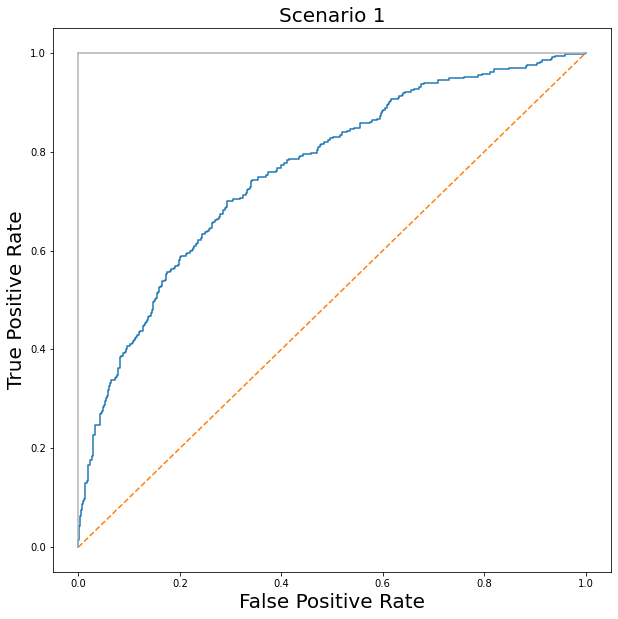

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Scenario 1', fontsize=20)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--", )
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.73      0.97      0.83       815
           1       0.61      0.13      0.21       331

    accuracy                           0.72      1146
   macro avg       0.67      0.55      0.52      1146
weighted avg       0.70      0.72      0.65      1146

[[787  28]
 [288  43]]
roc_auc_score for Logistic Regression:  0.6572683632050118


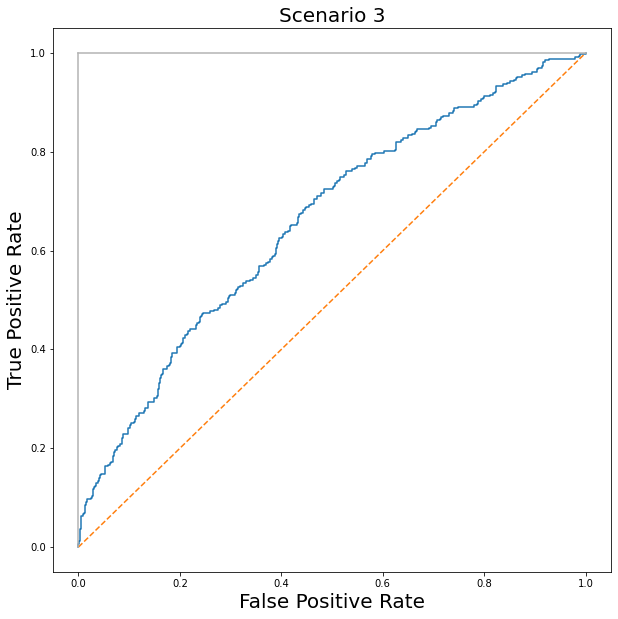

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_n.drop('HTN',axis=1), 
                                                    df_n['HTN'], test_size=0.30, 
                                                    random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

y_score = logmodel.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

plt.subplots(1, figsize=(10,10))
plt.title('Scenario 3', fontsize=20)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.73      0.96      0.83       815
           1       0.56      0.12      0.20       331

    accuracy                           0.72      1146
   macro avg       0.65      0.54      0.52      1146
weighted avg       0.68      0.72      0.65      1146

[[783  32]
 [290  41]]
roc_auc_score for Logistic Regression:  0.6557967119529963


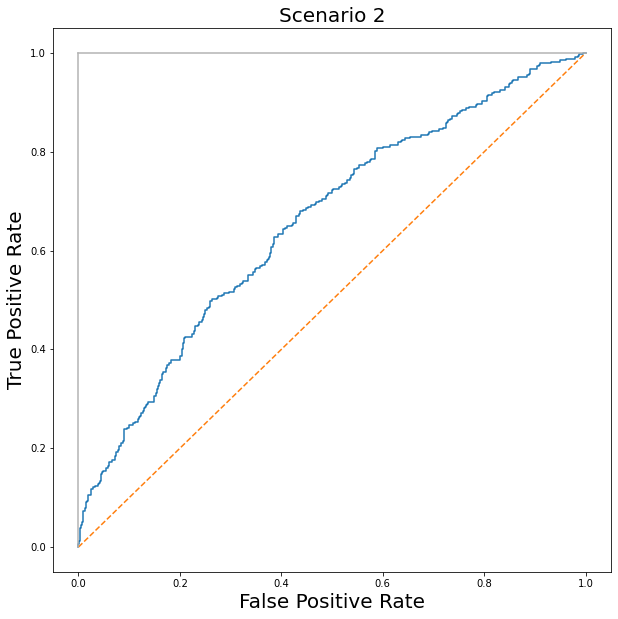

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_a.drop('HTN',axis=1), 
                                                    df_a['HTN'], test_size=0.30, 
                                                    random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

y_score = logmodel.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

plt.subplots(1, figsize=(10,10))
plt.title('Scenario 2', fontsize=20)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.show()




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.78      0.93      0.85       815
           1       0.67      0.34      0.45       331

    accuracy                           0.76      1146
   macro avg       0.72      0.63      0.65      1146
weighted avg       0.75      0.76      0.73      1146

[[761  54]
 [220 111]]
roc_auc_score for Logistic Regression:  0.7606286953459492


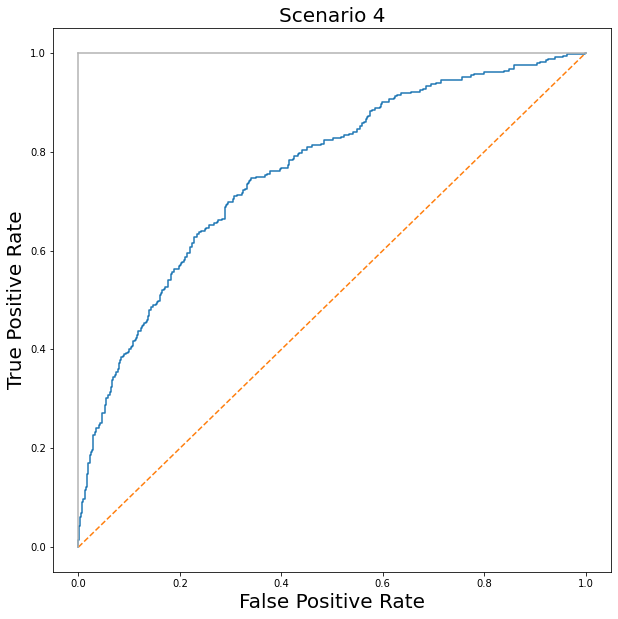

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_b.drop('HTN',axis=1), 
                                                    df_b['HTN'], test_size=0.30, 
                                                    random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

y_score = logmodel.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

plt.subplots(1, figsize=(10,10))
plt.title('Scenario 4', fontsize=20)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.show()


